### Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
v = pd.read_csv("vehicle.csv")
v.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axisrectangular,lengthrectangular,majorvariance,minorvariance,gyrationradius,majorskewness,minorskewness,minorkurtosis,majorkurtosis,hollows_ratio,class
0,95,43,96,202,65,10,189,35,22,143,217,534,166,71,6,27,190,197,opel
1,96,52,104,222,67,9,198,33,23,163,217,589,226,67,12,20,192,201,opel
2,107,52,101,218,64,11,202,33,23,164,219,610,192,65,17,2,197,206,opel
3,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211,opel
4,96,54,104,175,58,10,215,31,24,175,221,682,222,75,13,23,186,194,opel


#### Question 2

In [3]:
v_new=v.iloc[:, : 4]
v_new.corr()

,compactness,circularity,distance_circularity,radius_ratio
compactness,1.000000,0.692869,0.792444,0.691659
circularity,0.692869,1.000000,0.798492,0.622778
distance_circularity,0.792444,0.798492,1.000000,0.771644
radius_ratio,0.691659,0.622778,0.771644,1.000000


(array([  4.,  53., 130., 203., 132., 133., 102.,  66.,  17.,   6.]),
 array([ 73. ,  77.6,  82.2,  86.8,  91.4,  96. , 100.6, 105.2, 109.8,
        114.4, 119. ]),
 <BarContainer object of 10 artists>)

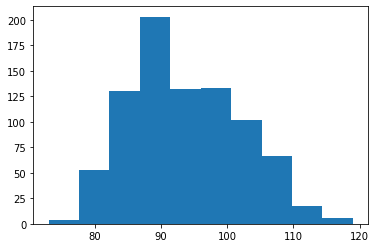

In [4]:
plt.hist(v_new['compactness'])

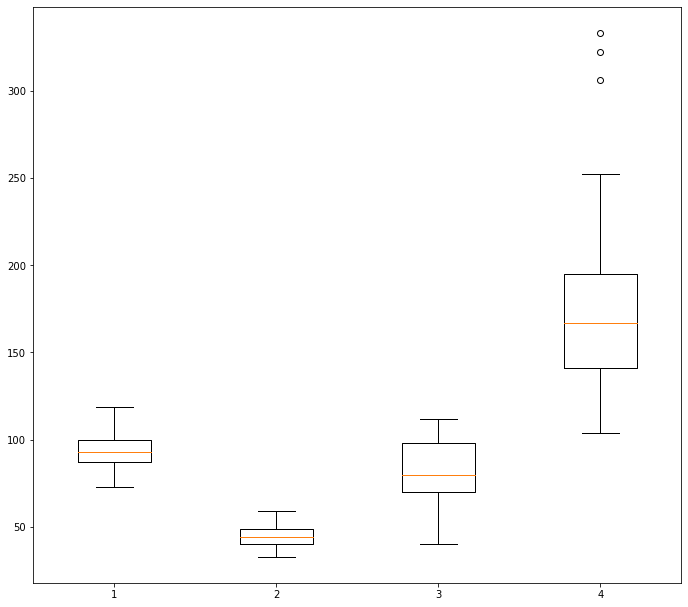

In [34]:
fig = plt.figure(figsize =(9, 8))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(v_new)

#### Question 3

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


In [21]:
Y = pd.Series(v['class'])
X = v.drop('class', axis = 1)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [26]:
maxdepth = [2, 5, 10, 15, 20] 


In [30]:
trainAcc = []
testAcc = []
for i in maxdepth:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, Y_train)
    Y_pred_train = clf.predict(X_train)
    Y_pred_test = clf.predict(X_test)
    
    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)
    
    trainAcc.append(train_accuracy)
    testAcc.append(test_accuracy)
    
    print("The train/test accuracy for a max depth of {} is {}, {} ".format(i, train_accuracy, test_accuracy))

The train/test accuracy for a max depth of 2 is 0.6342756183745583, 0.5857142857142857 
The train/test accuracy for a max depth of 5 is 0.8127208480565371, 0.7 
The train/test accuracy for a max depth of 10 is 0.950530035335689, 0.7 
The train/test accuracy for a max depth of 15 is 0.9964664310954063, 0.725 
The train/test accuracy for a max depth of 20 is 1.0, 0.7 


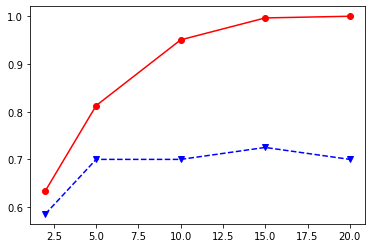

In [33]:
import matplotlib.pyplot as plt
plt.plot(maxdepth,trainAcc,'ro-',maxdepth,testAcc,'bv--')